### 绘制散点图矩阵

In [1]:
import warnings
warnings.filterwarnings("ignore")

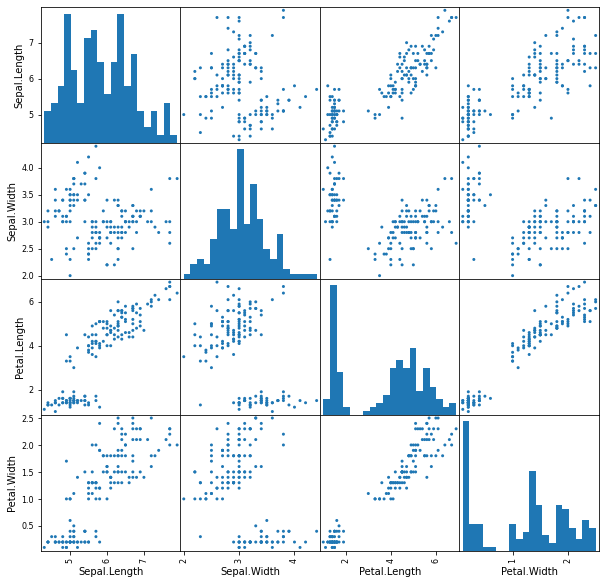

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
iris = pd.read_csv('http://image.cador.cn/data/iris.csv')

# 参数说明
#     figsize=(10,10) 设置画布大小为10x10
#     alpha=1，设置透明度，此处设置为不透明
#     hist_kwds={"bins":20} 设置对角线上直方图参数
#     可通过设置diagonal参数为kde将对角图像设置为密度图
pd.plotting.scatter_matrix(iris,figsize=(10,10),alpha=1,hist_kwds={"bins":20})
plt.show()

### 使用pairplot绘制散点图

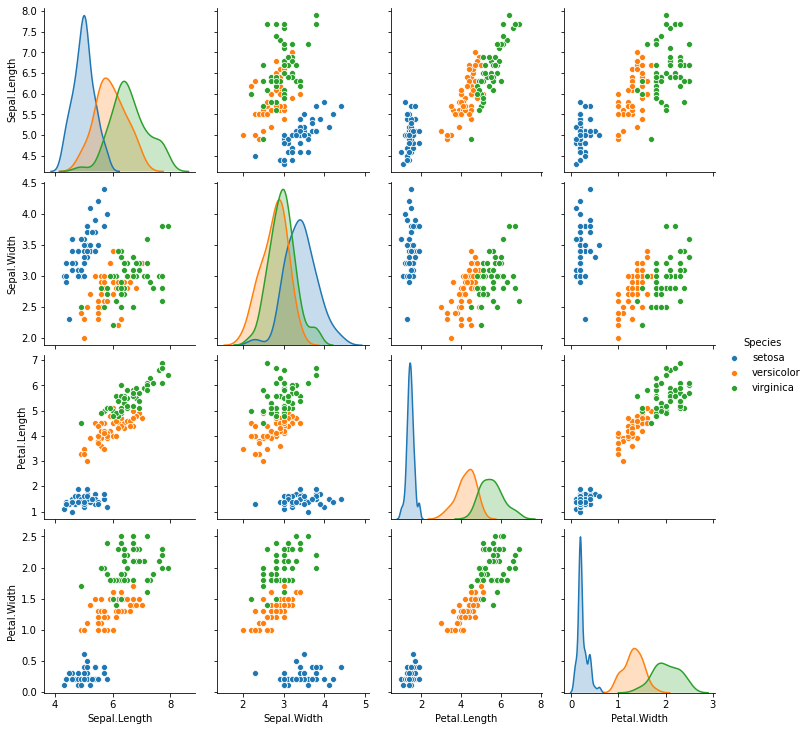

In [3]:
import seaborn as sns
sns.pairplot(iris,hue="Species")
plt.show()

### 自定义函数pair_plot

In [4]:
def pair_plot(df,plot_vars,colors,target_types,markers,color_col,marker_col,fig_size=(15,15)):
    # 设置画布大小
    plt.figure(figsize=fig_size)
    plot_len = len(plot_vars)
    index = 0
    for p_col in range(plot_len):
        col_index = 1
        for p_row in range(plot_len):
            index = index + 1
            plt.subplot(plot_len, plot_len, index)
            if p_row != p_col:
                # 非对角位置，绘制散点图
                df.apply(lambda row:plt.plot(row[plot_vars[p_row]],row[plot_vars[p_col]],
                                              color=colors[int(row[color_col])],
                                              marker=markers[int(row[marker_col])],linestyle=''),axis=1)
            else:
                # 对角位置，绘制密度图
                for ci in range(len(colors)):
                    sns.kdeplot(df.iloc[np.where(df[color_col]==ci)[0],p_row],
                                shade=True, color=colors[ci],label=target_types[ci])
            # 添加横纵坐标轴标签
            if col_index == 1:
                plt.ylabel(plot_vars[p_col])
                col_index = col_index + 1
            if p_col == plot_len - 1:
                plt.xlabel(plot_vars[p_row])
    plt.show()

### 基于pair_plot函数绘制散点图

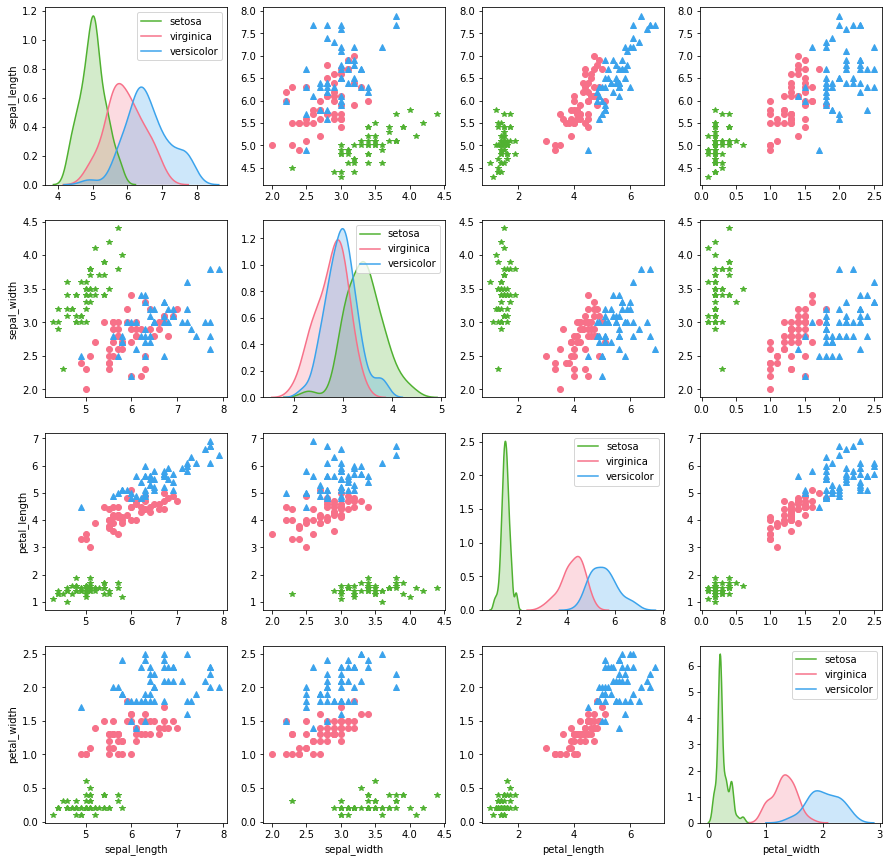

In [5]:
import numpy as np
# 重置变量名称
features = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df=iris.drop(columns='Species')
iris_df.columns = features

# 此处，我们建立两个新变量，都存储花色分类值，其中type对应真实类别，cluster对应预测类别
iris_df['type'] = iris.Species
iris_df['cluster'] = iris.Species

# 将cluster变量转化为整数编码
iris_df.cluster = iris_df.cluster.astype('category')
iris_df.cluster = iris_df.cluster.cat.codes

# 将type变量转化为整数编码
iris_df.type = iris_df.type.astype('category')
iris_df.type = iris_df.type.cat.codes

# 获得花色类别列表
types = iris.Species.value_counts().index.tolist()
pair_plot(df=iris_df,
          plot_vars=features,
          colors=['#50B131','#F77189','#3BA3EC'], # 指定描述三种花对应的颜色
          target_types = types,
          markers= ['*','o','^'], # 指定预测类别cluster对应的形状
          color_col='type', # 对应真实类别变量
          marker_col='cluster') #  对应预测类别变量

### 绘制三维散点图

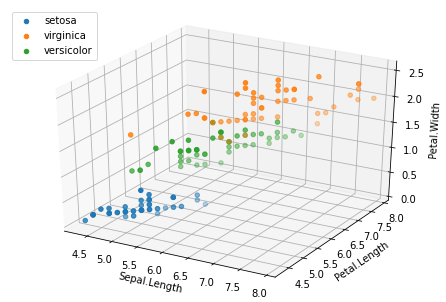

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

dims = {'x':'Sepal.Length','y':'Petal.Length','z':'Petal.Width'}
types = iris.Species.value_counts().index.tolist()

# 绘制散点图
fig = plt.figure()
ax = Axes3D(fig)
for iris_type in types:
    tmp_data = iris[iris.Species==iris_type]
    x,y,z = tmp_data[dims['x']], tmp_data[dims['x']], tmp_data[dims['z']]
    ax.scatter(x, y, z, label=iris_type)

# 绘制图例
ax.legend(loc='upper left')

# 添加坐标轴(顺序是Z, Y, X)
ax.set_zlabel(dims['z'])
ax.set_ylabel(dims['y'])
ax.set_xlabel(dims['x'])
plt.show()

### 计算相关系数矩阵

In [7]:
df=iris.drop(columns='Species')
corr = df.corr()
corr

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


### 自定义函数corrplot

In [8]:
def corrplot(corr,cmap,s):
    #使用x,y,z来存储变量对应矩阵中的位置信息，以及相关系数
    x,y,z = [],[],[]
    N = corr.shape[0]
    for row in range(N):
        for column in range(N):
            x.append(row)
            y.append(N - 1 - column)
            z.append(round(corr.iloc[row,column],2))
    # 使用scatter函数绘制圆圈矩阵
    sc = plt.scatter(x, y, c=z, vmin=-1, vmax=1, s=s*np.abs(z), cmap=plt.cm.get_cmap(cmap))
    # 添加颜色板
    plt.colorbar(sc)
    # 设置横纵坐标轴的区间范围
    plt.xlim((-0.5,N-0.5))
    plt.ylim((-0.5,N-0.5))
    # 设置横纵坐标轴值标签
    plt.xticks(range(N),corr.columns,rotation=90)
    plt.yticks(range(N)[::-1],corr.columns)
    # 去掉默认网格
    plt.grid(False)
    # 使用顶部的轴做为横轴
    ax = plt.gca()
    ax.xaxis.set_ticks_position('top')
    # 重新绘制网格线
    internal_space = [0.5 + k for k in range(4)]
    [plt.plot([m,m],[-0.5,N-0.5],c='lightgray') for m in internal_space]
    [plt.plot([-0.5,N-0.5],[m,m],c='lightgray') for m in internal_space]
    # 显示图形
    plt.show()

### 绘制相关矩阵图

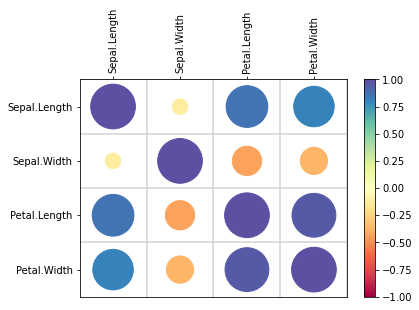

In [9]:
corrplot(corr,cmap="Spectral",s=2000)

### 绘制相关层次图

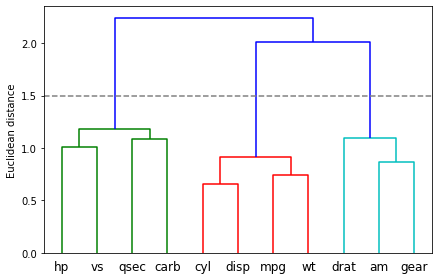

In [10]:
import pandas as pd
import numpy as np
mtcars = pd.read_csv("http://image.cador.cn/data/mtcars.csv")
mtcars.drop(columns="_",inplace=True)

# 计算第四种相异性度量
d=np.sqrt(1-mtcars.corr()*mtcars.corr())

from scipy.spatial.distance import pdist,squareform
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
row_clusters = linkage(pdist(d,metric='euclidean'),method='ward')
row_dendr = dendrogram(row_clusters,labels = d.index)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.plot([0,2000],[1.5,1.5],c='gray',linestyle='--')
plt.show()